# import

In [14]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sidetable as stb


from sklearn.model_selection import train_test_split # TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, PowerTransformer
# .fit(), .transformer(), fit_transformer()
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder 
from sklearn import metrics # .mean_squared_error(), .r2_score()
from sklearn.linear_model import Ridge
from sklearn.metrics import silhouette_score

from sklearn.model_selection import GridSearchCV


from sklearn.cluster import KMeans, MeanShift, DBSCAN

# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# # create blobs
data = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=2, random_state=0)

db = pd.DataFrame(data = data[0], columns = ['zero', 'um'])
db['class'] = data[1]

# Clustering tutorial

In [15]:
print(
    db.head(),
db.describe(),
sep='\n'
)

       zero        um  class
0 -0.087568  2.421044      2
1  2.876447  4.001073      0
2 -1.473427  3.284783      2
3 -0.691197  2.837845      2
4 -3.535549  0.921499      2
              zero           um        class
count  1000.000000  1000.000000  1000.000000
mean      0.446190     2.678159     0.999000
std       2.491837     2.405894     0.817109
min      -7.516130    -4.771445     0.000000
25%      -1.248238     0.988365     0.000000
50%       0.434169     2.695653     1.000000
75%       2.235754     4.422747     2.000000
max       8.397217     9.128695     2.000000


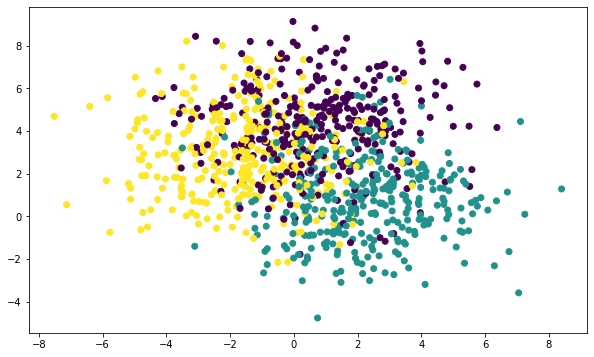

In [16]:

# create scatter plot
fig = plt.figure(figsize=(10,6))
# fig.add_subplot(projection='3d')

plt.scatter(db['zero'], db['um'], c=db['class'])


In [17]:
# create kmeans object
kmeans = KMeans(n_clusters=3)
# print(kmeans)

# fit kmeans object to data
kmeans.fit(db)

# print location of clusters learned by kmeans object
# print(kmeans.cluster_centers_)

# save new clusters for chart
y_km = kmeans.fit_predict(db)

# print(y_km)

db['km'] = y_km

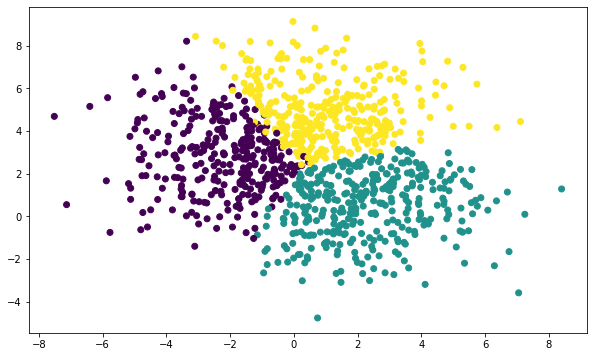

In [18]:
fig = plt.figure(figsize=(10,6))
# fig.add_subplot(projection='3d')

plt.scatter(db['zero'], db['um'], c=db['km'])

In [19]:
# create dendrogram
# dendrogram = sch.dendrogram(sch.linkage(db, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
y_hc = hc.fit_predict(db)

db['hc'] = y_hc

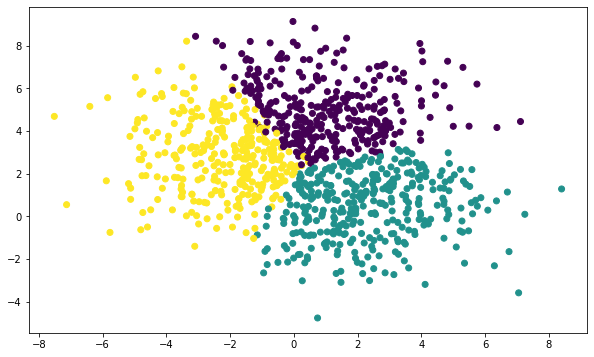

In [20]:
fig = plt.figure(figsize=(10,6))

plt.scatter(db['zero'], db['um'], c=db['hc'])

# Importacao

In [21]:
db = pd.read_csv('C:\Repositories\experimentation\data\centroid_PINiCo2.csv')

In [22]:
db.columns

Index(['Unnamed: 0', 'index', 'Particle ID', 'sample', 'Grain ID',
       'Mineral Classification', 'Spectrum Counts', 'Porosity', 'Roughness',
       'Area µm²', 'Ti', 'O', 'C', 'Fe', 'Al', 'Si', 'Ni', 'Mn', 'Co', 'Mg',
       'S', 'V', 'Sc', 'Cu', 'Cr', 'Ca', 'Ba', 'Na', 'K', 'Zn'],
      dtype='object')

In [23]:
db_chem = db.loc[:, ['Mineral Classification', 'Spectrum Counts', 'Ti', 'Fe', 'Al', 'Si', 'Ni', 'Mn', 'Co', 'Mg', 'Cr', 'Ca', 'Ba', 'Na', 'K', 'Zn']]

# Pipeline

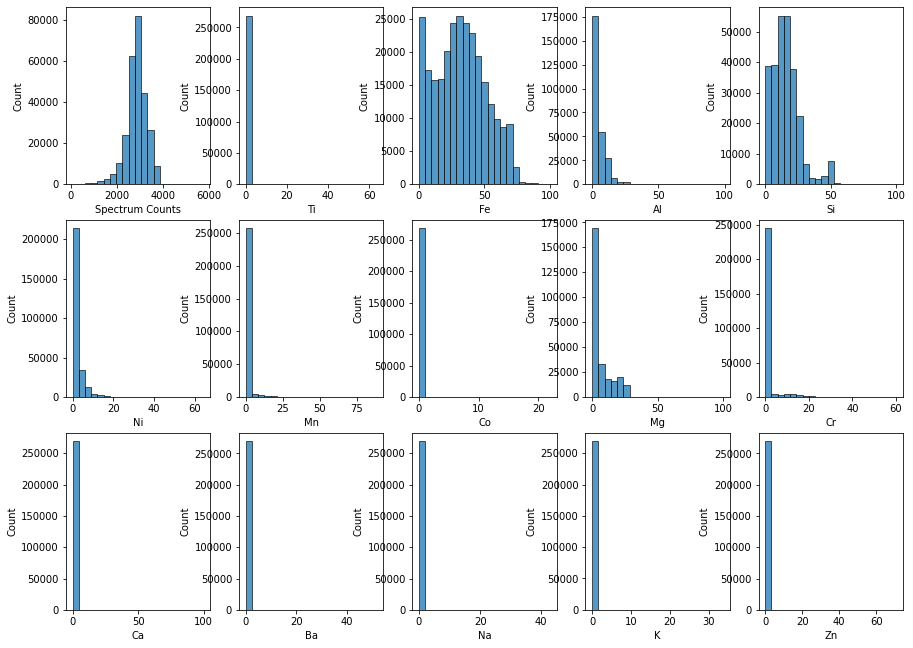

In [32]:
# ANALISANDO DISTRIBUICAO DOS ELEMENTOS

plt.figure(figsize=(15,15))
x = 1
for i in db_chem.loc[:,'Spectrum Counts':].columns:
    plt.subplot(4,5, x)
    x += 1
    sns.histplot(data = db_chem, x = i, bins = 21);

DEPRECATED LOG TRANSFORMATION

db_yeo = np.log(db_train)
db_yeo = (
            pd.DataFrame(
                columns = db_train.columns, 
                data = StandardScaler().fit_transform(db_yeo)
            ))

PowerTransformer(method = 'box-cox', standardize = True,).fit_transform(db_train)

In [28]:
PT = PowerTransformer(method='yeo-johnson', standardize = True).fit_transform(db_chem.loc[:,'Spectrum Counts':])

X = db_chem.loc[:,'Mineral Classification']

X = pd.concat(
    [X, pd.DataFrame(data = PT, columns=db_chem.loc[:,'Spectrum Counts':].columns)],
    axis = 1)


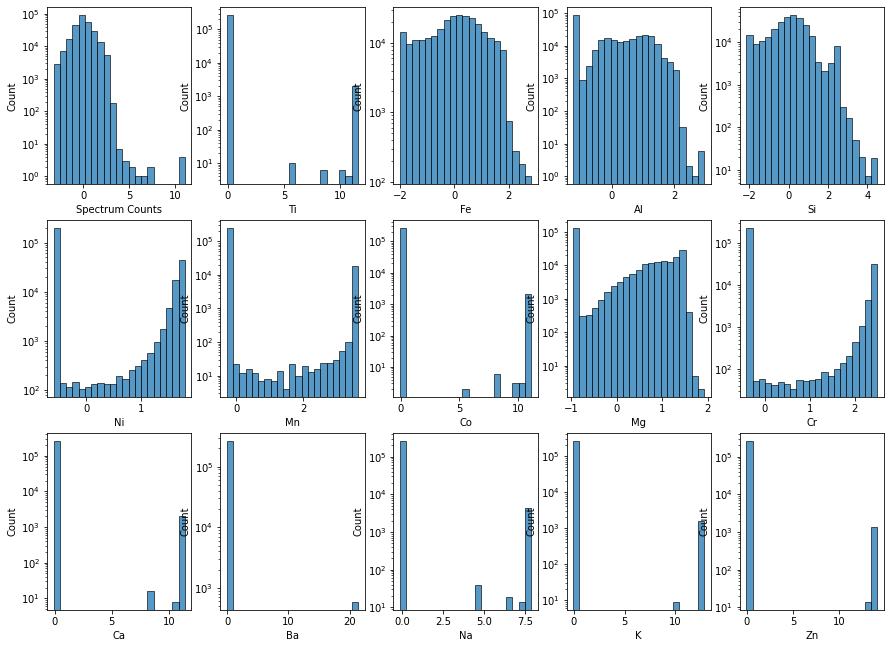

In [33]:
plt.figure(figsize=(15,15))
x = 1
for i in X.loc[:, 'Spectrum Counts':].columns:
    plt.subplot(4,5, x)
    x += 1
    sns.histplot(data = X, x = i, bins = 21)
    plt.yscale('log');

# Split Data

In [34]:
y = X[['Mineral Classification']]
X.drop('Mineral Classification', axis = 1, inplace = True)

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.9)

for i in [XTrain, XTest, yTrain, yTest]:
    i.reset_index(inplace=True, drop = True)

display(XTrain.head(), XTest.head(), yTrain.head(), yTest.head())


,Spectrum Counts,Ti,Fe,Al,Si,Ni,Mn,Co,Mg,Cr,Ca,Ba,Na,K,Zn
0,-0.235075,-0.086643,-1.407990,-1.221147,0.670421,-0.595287,-0.277629,-0.089816,1.449414,-0.410314,-0.087819,-0.046873,-0.127728,-0.077917,-0.070695
1,1.047108,-0.086643,-0.167700,0.431620,-0.945557,-0.595287,-0.277629,-0.089816,1.108598,2.503147,-0.087819,-0.046873,-0.127728,-0.077917,-0.070695
2,-0.649201,-0.086643,0.392107,1.327051,-0.169936,-0.595287,-0.277629,-0.089816,-0.953258,-0.410314,-0.087819,-0.046873,-0.127728,-0.077917,-0.070695
3,0.089348,-0.086643,1.030587,0.982374,-0.571434,-0.595287,-0.277629,-0.089816,-0.953258,-0.410314,-0.087819,-0.046873,-0.127728,-0.077917,-0.070695
4,-0.076280,-0.086643,-0.395715,1.072039,0.760199,1.730818,-0.277629,-0.089816,-0.953258,-0.410314,-0.087819,-0.046873,-0.127728,-0.077917,-0.070695


,Spectrum Counts,Ti,Fe,Al,Si,Ni,Mn,Co,Mg,Cr,Ca,Ba,Na,K,Zn
0,0.436831,-0.086643,-0.377823,0.130325,0.945333,1.538699,-0.277629,-0.089816,0.602637,-0.410314,-0.087819,-0.046873,-0.127728,-0.077917,-0.070695
1,1.047108,-0.086643,0.694144,-1.221147,-1.459188,-0.595287,-0.277629,-0.089816,0.681482,2.503043,-0.087819,-0.046873,-0.127728,-0.077917,-0.070695
2,0.881629,-0.086643,0.865905,0.552611,-0.811221,-0.595287,-0.277629,-0.089816,1.029278,-0.410314,-0.087819,-0.046873,-0.127728,-0.077917,-0.070695
3,0.698307,-0.086643,-0.314996,1.517801,-0.245348,-0.595287,3.615626,-0.089816,-0.953258,2.495953,-0.087819,-0.046873,-0.127728,-0.077917,-0.070695
4,0.157856,-0.086643,-0.214873,0.150318,0.966119,1.715965,-0.277629,-0.089816,-0.953258,-0.410314,-0.087819,-0.046873,-0.127728,-0.077917,-0.070695


,Mineral Classification
0,Serpentine
1,Chlorite
2,Chlorite Fe-rich
3,Goethite
4,Smectite Fe-rich


,Mineral Classification
0,Smectite Fe-rich
1,Chr Cr-Magnetite
2,Unclassified
3,Chlorite Fe-rich
4,Smectite Fe-rich


# K-means nos dados mineralogic

In [34]:
# create kmeans object
kmeans = KMeans(n_clusters=30)

kmeans.fit(XTrain)

# print(kmeans.cluster_centers_)

y_km = kmeans.fit_predict(XTrain)

yTrain['km'] = y_km

In [72]:
db_melt = XTrain.melt(id_vars= ['km'])

In [16]:
db_melt.head()

,km,variable,value
0,20,Fe,0.147527
1,7,Fe,-0.428957
2,28,Fe,0.727148
3,15,Fe,-2.018427
4,29,Fe,-1.830843


In [ ]:
import seaborn as sns

for i in range(3):
    filter = (db_melt['km'] == i)
    plt.figure(figsize=(16,4))
    sns.boxplot(data = db_melt[filter], x = 'km', y = 'value', hue = 'variable');

# Agglomerative Clustering

In [135]:
hc = AgglomerativeClustering(n_clusters=32, affinity = 'euclidean', linkage = 'ward', compute_full_tree = True)
y_hc = hc.fit_predict(db_train.loc[:,:'Zn'])

db_train['hc'] = y_hc

In [99]:
db_melt = db_train.melt(id_vars= ['hc'])
db_melt.head()

,hc,variable,value
0,1,Fe,4.237624
1,0,Fe,3.717300
2,0,Fe,3.459250
3,1,Fe,2.737811
4,17,Fe,3.230137


In [ ]:
for i in range(5):
    filter = (db_melt['hc'] == i)
    plt.figure(figsize=(16,4))
    sns.boxplot(data = db_melt[filter], x = 'hc', y = 'value', hue = 'variable');

# Silhouette

29


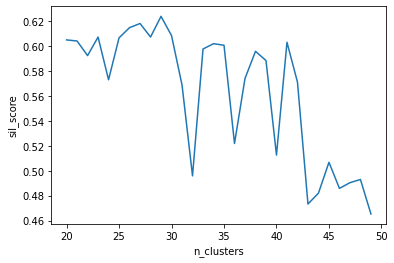

In [125]:
sil_score_max = -1 #this is the minimum possible score
X = db_train.loc[:,:'Zn']
silhouette = pd.DataFrame(columns = ['n_clusters', 'sil_score'])

for n_clusters in range(20,50,1):
  model = KMeans(n_clusters = n_clusters, init='k-means++', n_init=1)
  labels = model.fit_predict(X)
  sil_score = silhouette_score(X, labels)
  # print("The average silhouette score for %i clusters is %0.2f" %(n_clusters,sil_score))

  silhouette = pd.concat([silhouette, pd.DataFrame(data=[[n_clusters, sil_score]], columns=['n_clusters', 'sil_score'])])
  if sil_score > sil_score_max:
    sil_score_max = sil_score
    best_n_clusters = n_clusters

silhouette.reset_index(inplace=True, drop=True)
sns.lineplot(data=silhouette, x = 'n_clusters', y = 'sil_score')
text = n_clusters #silhouette[silhouette.sil_score == silhouette.sil_score.max()]['n_clusters']
plt.annotate(text = f'{text}', xy = (n_clusters, best_n_clusters), xytext = (30,0.4));

print(best_n_clusters)

# Average Chemistry per Group

In [136]:
db_train_base.reset_index(drop=True, inplace = True)
db_train.reset_index(drop=True, inplace = True)

In [ ]:
for i in sorted(db_train.hc.unique()):
    print(f'______________________{i}______________________')
    display(
        db_train_base.loc[db_train[db_train.hc == i].index,:].describe().T
    )

In [138]:
db_train_base['hc'] = db_train['hc']

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(
    db_train_base
    .groupby(['hc', 'Mineral Classification'])
    .agg({'hc':'count'})
    #.sort_values(by = 'hc')
)

In [142]:
(
    db_train_base
    .groupby('hc')
    .agg('mean')
)

,Ti,Fe,Al,Si,Ni,Mn,Co,Mg,Cr,Ca,Ba,Na,K,Zn
hc,,,,,,,,,,,,,,
0,0.000000,27.795722,4.262577,18.786134,1.256804,0.447268,0.003969,4.381031,2.063093,0.000000,0.000000,1.138711,0.000000,0.000000
1,0.000000,32.198717,3.389943,20.397651,5.344255,0.000000,0.000000,0.000094,0.000019,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,27.603469,3.130918,17.193469,1.706429,0.160408,0.000000,3.552551,0.923265,4.393878,0.000000,0.000000,0.000000,0.000000
3,0.000000,8.365455,7.326364,8.963030,6.191818,21.484242,6.681818,0.985253,0.123131,0.005556,0.000000,0.000000,0.000000,0.000000
4,0.000000,23.755154,6.124703,11.273895,9.230000,9.967791,0.000000,2.393444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.095294,4.209412,12.043529,25.645882,0.000000,0.000000,0.000000,0.000000,0.000000,0.755882,0.000000,0.281765,11.416471,0.000000
6,0.000000,37.005683,6.666244,10.588220,0.116293,5.532561,0.000000,1.991049,0.525122,0.000000,0.000000,0.000000,0.000683,0.000000
7,0.001233,27.031644,4.493836,16.762329,1.244110,0.494658,0.000000,7.465616,2.281096,0.000000,0.000000,0.107397,0.000000,1.226301
8,0.000000,43.079597,0.000168,12.822225,0.000088,0.000000,0.000000,8.188492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Spinels

In [68]:
sp = pd.read_csv('C:\Repositories\experimentation\data\centroid_PINiCo2.csv')
sp = sp.loc[:, ['Mineral Classification','Ti', 'O', 'Fe', 'Al', 'Si', 'Ni', 'Mn', 'Co', 'Mg','Cr', 'Ca', 'Ba', 'Na', 'K', 'Zn']]
lista = ['Chr Cr-Magnetite', 'Chr Spinel', 'Chromite', 'Chromite Al > 10', 'Chromite Al > 14.5']
sp = sp[[True if min in lista else False for min in sp['Mineral Classification']]]
sp.reset_index(inplace=True, drop=True)

# affinity = “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”
# linkage =  {‘ward’, ‘complete’, ‘average’, ‘single’}


hc = AgglomerativeClustering(n_clusters= 4, affinity = 'euclidean', linkage = 'ward', compute_full_tree = False)
y_hc = hc.fit_predict(sp.loc[:,'Ti':'Zn'])

sp['hc'] = y_hc

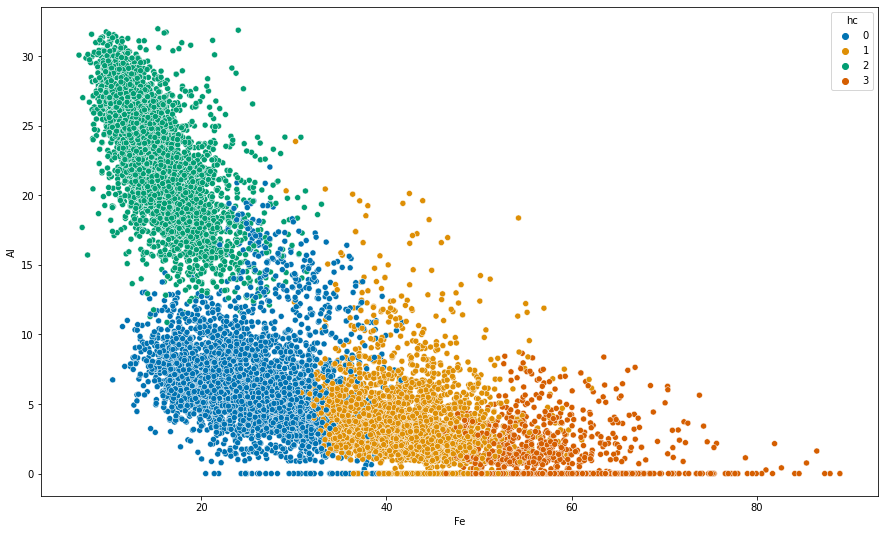

In [69]:
plt.figure(figsize=(15,9))
sns.scatterplot(data = sp, hue = 'hc', x = 'Fe', y = 'Al', palette = 'colorblind');


In [70]:
sp['hc'] = sp.hc.astype('category')

<Figure size 720x632.178 with 0 Axes>

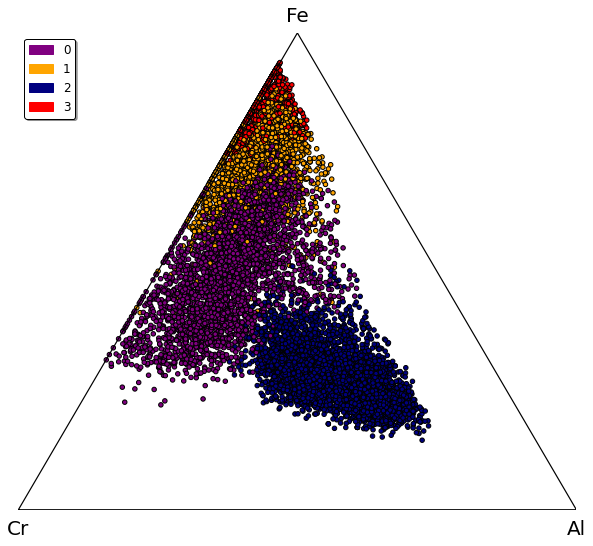

In [71]:
import matt_modules as mm

legenda = {0:'purple',1:'orange',2:'navy',3:'red'}
#legenda = {'Chr Cr-Magnetite': 'black', 'Chr Spinel':'orange', 'Chromite':'purple', 'Chromite Al > 10':'navy','Chromite Al > 14.5': 'red'}

mm.ternary_plot(
    x = sp.Cr, y = sp.Al, z = sp.Fe, s = 20, 
    #barvar = sp.Mg, cmapcolor = 'coolwarm',
    non_num = sp['hc'], discrete_colors = legenda
)




# DBSCAN

In [46]:
DS = DBSCAN(eps=3, min_samples = 5)
yTrain['DBSCAN'] = DS.fit_predict(XTrain)
yTrain.DBSCAN.nunique()

15

In [41]:
silhouette_db = pd.DataFrame(columns= ('eps', 'sil_score'))

for i in range(10, 200, 20):
    model = DBSCAN(eps= i/10, min_samples = 5).fit_predict(XTrain)
    nunique = pd.Series(model).nunique()
    silhouette_db.loc[i, 'eps'] = i/10
    silhouette_db.loc[i, 'nunique'] = nunique
    silhouette_db.loc[i, 'sil_score'] = silhouette_score(XTrain, model, random_state = 0)

display(silhouette_db)

,eps,sil_score,nunique
10,1.0,0.071282,43.0
30,3.0,0.57328,15.0
50,5.0,0.675348,10.0
70,7.0,0.675348,10.0
90,9.0,0.676214,8.0
110,11.0,0.667809,7.0
130,13.0,0.796455,3.0
150,15.0,0.798206,2.0
170,17.0,0.798206,2.0
190,19.0,0.798206,2.0


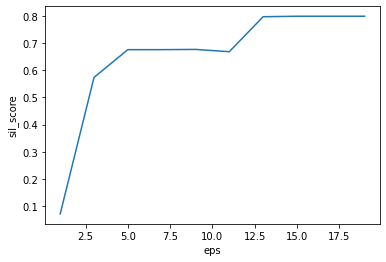

In [42]:
sns.lineplot(data = silhouette_db, x = 'eps', y = 'sil_score');

,min_samp,sil_score,nunique
3,3,0.367085,19.0
4,4,0.366861,17.0
5,5,0.57328,15.0
6,6,0.574896,13.0
7,7,0.574896,13.0
8,8,0.574896,13.0
9,9,0.574896,13.0
10,10,0.576322,11.0


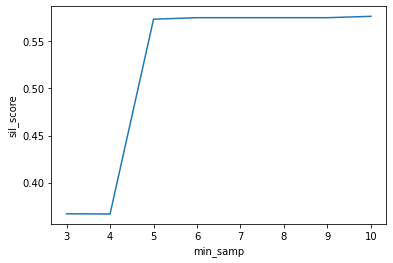

In [47]:
silhouette_db = pd.DataFrame(columns= ('min_samp', 'sil_score'))

for i in range(3,11,1):
    model = DBSCAN(eps= 3, min_samples = i).fit_predict(XTrain)
    nunique = pd.Series(model).nunique()
    silhouette_db.loc[i, 'min_samp'] = i
    silhouette_db.loc[i, 'nunique'] = nunique
    silhouette_db.loc[i, 'sil_score'] = silhouette_score(XTrain, model, random_state = 0)

display(silhouette_db)

sns.lineplot(data = silhouette_db, x = 'min_samp', y = 'sil_score');

# GridSearchCV

In [76]:
silhouette_db = pd.DataFrame(columns= ('min_samp', 'sil_score'))
x = 1
for eps in [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]:
    for min_samp in range(3,11,1):
        
        model = DBSCAN(eps= eps, min_samples = min_samp).fit_predict(XTrain)
        nunique = pd.Series(model).nunique()
        silhouette_db.loc[x, 'nunique'] = nunique
        silhouette_db.loc[x, 'min_samp'] = min_samp
        silhouette_db.loc[x, 'eps'] = eps
        silhouette_db.loc[x, 'sil_score'] = silhouette_score(XTrain, model, random_state = 0)

        x += 1

display(silhouette_db)

,min_samp,sil_score,nunique,eps
1,3,-0.605252,541.0,0.1
2,4,-0.583041,246.0,0.1
3,5,-0.492226,110.0,0.1
4,6,-0.49735,72.0,0.1
5,7,-0.477071,48.0,0.1
...,...,...,...,...
76,6,0.5495,22.0,1.9
77,7,0.553162,19.0,1.9
78,8,0.552654,18.0,1.9
79,9,0.553045,15.0,1.9


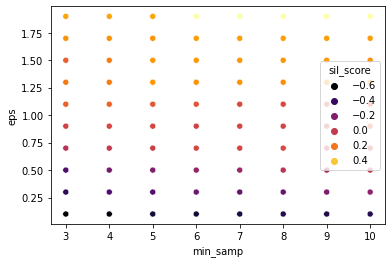

In [77]:
sns.scatterplot(data = silhouette_db, x = 'min_samp', y = 'eps', hue = 'sil_score', palette= 'inferno');
